In [1]:
# Script to reformat the parameter file into (ms, gs2, gw2, gp2, gd2, kappa, lambda, zeta, lambdav)
import numpy as np
params = np.loadtxt("DINO_calibration_set.txt")
n = len(params)

with open("param_sets_DINO.txt", "w") as output_file:
    for i in range(n):
        print(f"{params[i][12]}", file=output_file, end='  ')
        for j in range(0,7):
            print(f"{params[i][j]}", file=output_file, end='  ')
        print(f"{params[i][8]}", file=output_file, end='  ')
        print("",file=output_file)

In [4]:
n_runs = 250000     # number of total monte carlo samples needed
n_chains = 4       # number of MCMC chains
n_burnin = 10000    # number of runs taken as burnin
t_burnin = 17700    # time taken for burnin on average
t_days = (n_runs/(n_chains*n_burnin) + 1)*t_burnin/(3600*24)
print(t_days,"days to get posterior")

t_run = 17700/(8*n_burnin)
t_observables = t_run*n_runs
print(t_observables/3600,"hours to compute all observables for Posterior")

t_hf = 160  # time in seconds for high fidelity of 10 nuclei
n_runs_hf = 500
t_days_hf = t_hf*n_runs_hf/(3600*24)
print(f"{n_runs_hf} high fidelity runs to error check would take {t_days_hf} days")


1.4852430555555556 days to get posterior
15.364583333333334 hours to compute all observables for Posterior
500 high fidelity runs to error check would take 0.9259259259259259 days


250000


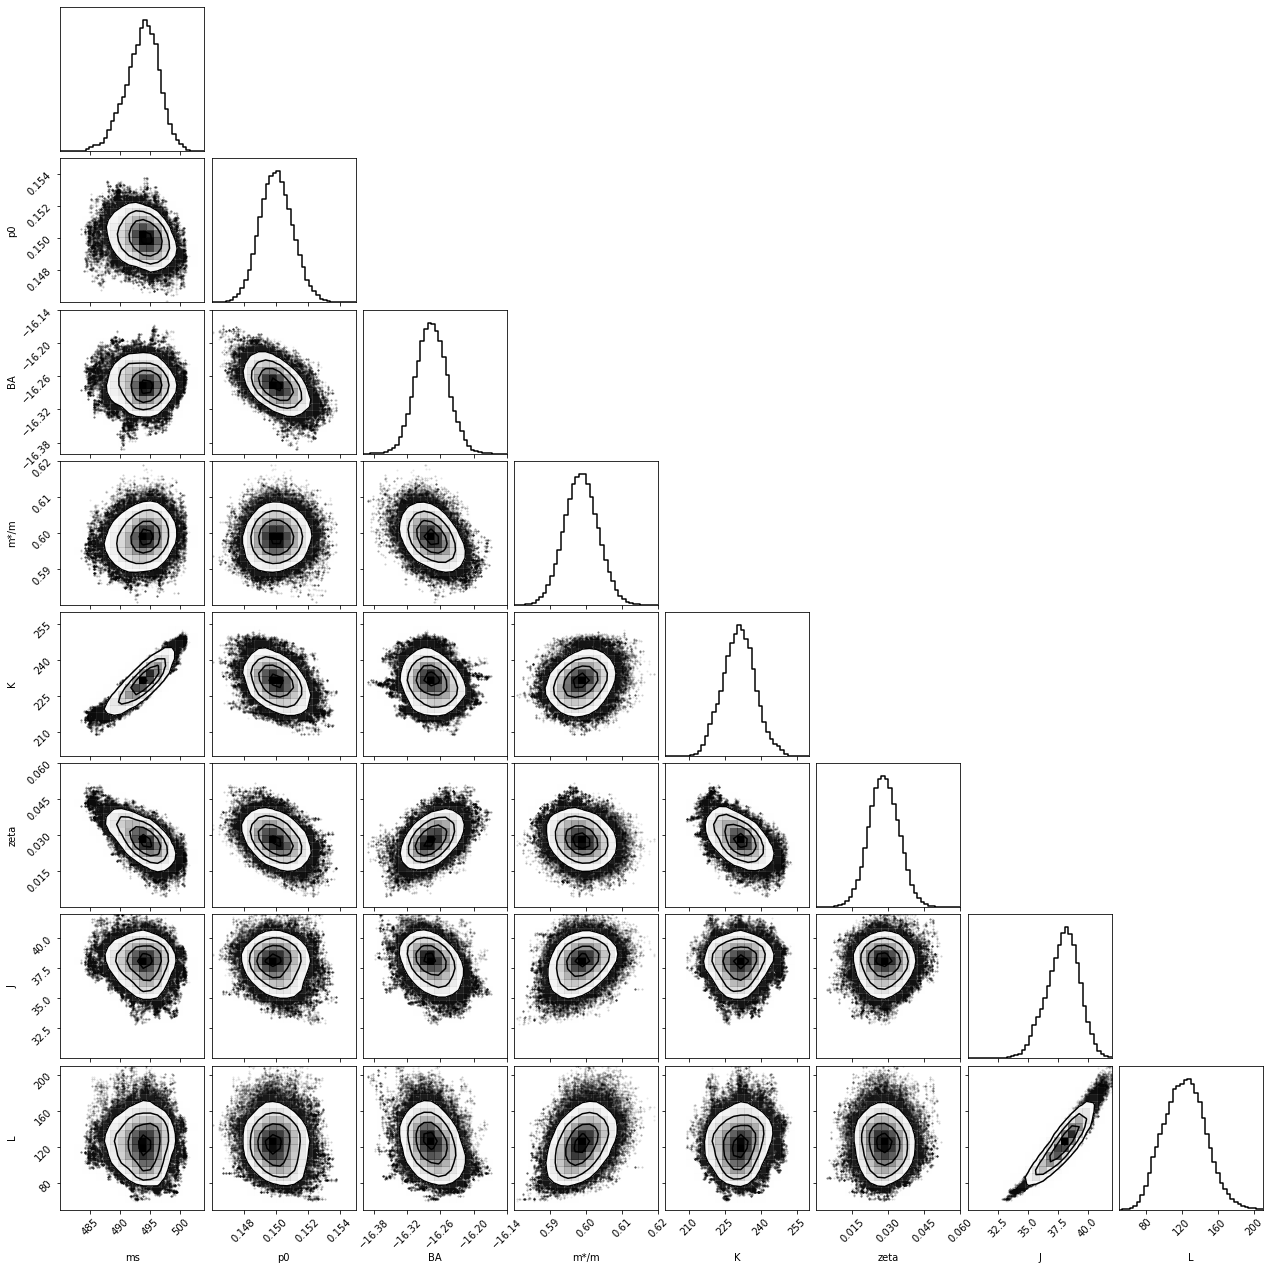

In [42]:
import corner
import numpy as np
import matplotlib.pyplot as plt
samples = np.loadtxt("MCMC_noskin.txt")

new_samples = np.zeros_like(samples)
for i in range(len(samples)):
    new_samples[i,0] = samples[i,7]
    new_samples[i,1] = samples[i,1]
    new_samples[i,2] = samples[i,0]
    new_samples[i,3] = samples[i,2]
    new_samples[i,4] = samples[i,3]
    new_samples[i,5] = samples[i,6]
    new_samples[i,6] = samples[i,4]
    new_samples[i,7] = samples[i,5]
new_samples = np.array(new_samples)

c_samples = []
i=0
while (i < len(new_samples)):
    c_samples.append(new_samples[i,:])
    i += 1
c_samples = np.array(c_samples)
print(len(c_samples))

ranges = [(480,504),(0.146,0.155),(-16.4,-16.14),(0.58,0.62),(200,260),(0,0.06),(30,42),(50,210)]
figure = corner.corner(c_samples,labels=["ms","p0","BA","m*/m","K","zeta","J","L"],hist_bin_factor=[2.0]*8,smooth=0.7,smooth1d=0.6,bins=[20]*8,range=ranges)
plt.savefig("Corner.png",transparent=False,facecolor='white')

In [414]:
import statistics
posterior = np.loadtxt("Posterior_noskin.txt")
for i in range(30):
    print(f"{statistics.mean(posterior[:,i])}  {statistics.stdev(posterior[:,i])}  {min(posterior[:,i])}  {max(posterior[:,i])}")


-16.27550113678805  0.02784515742767239  -16.391100102714645  -16.168608228585374
0.15004790714657257  0.001020023502289923  0.14593929844599865  0.1537897075413452
0.598661002256021  0.004613568897562519  0.5807990255491507  0.618956043045692
230.77327244908972  6.632507668481943  208.84206550321602  252.31784602178703
37.94451864647914  1.3551409764710427  32.828550634668616  43.32235317129384
123.55145494700821  22.88699558405694  59.026693631337935  220.2650347286009
0.028198928263439435  0.006189889092789684  0.004529034927876129  0.0517284887047211
493.6076641346023  2.8046237523037685  483.38778029172755  501.4466414656431
-7.996789880165945  0.00940458436732032  -8.035032784968166  -7.952113629996575
2.727855241973961  0.004369539560371259  2.7108336035004754  2.748467696452076
-8.550777517810992  0.007867663788861673  -8.585671664449933  -8.518531770843992
3.4633478590243523  0.003402483319675037  3.4448976331806995  3.4776622976429614
-8.629454336382596  0.006234483641531821 

0 0 0
1 0 1
2 0 2
3 0 3
4 0 4
5 1 0
6 1 1
7 1 2
8 1 3
9 1 4
10 2 0
11 2 1
12 2 2
13 2 3
14 2 4
15 3 0
16 3 1
17 3 2
18 3 3
19 3 4
20 4 0
21 4 1


AttributeError: 'numpy.ndarray' object has no attribute 'axis'

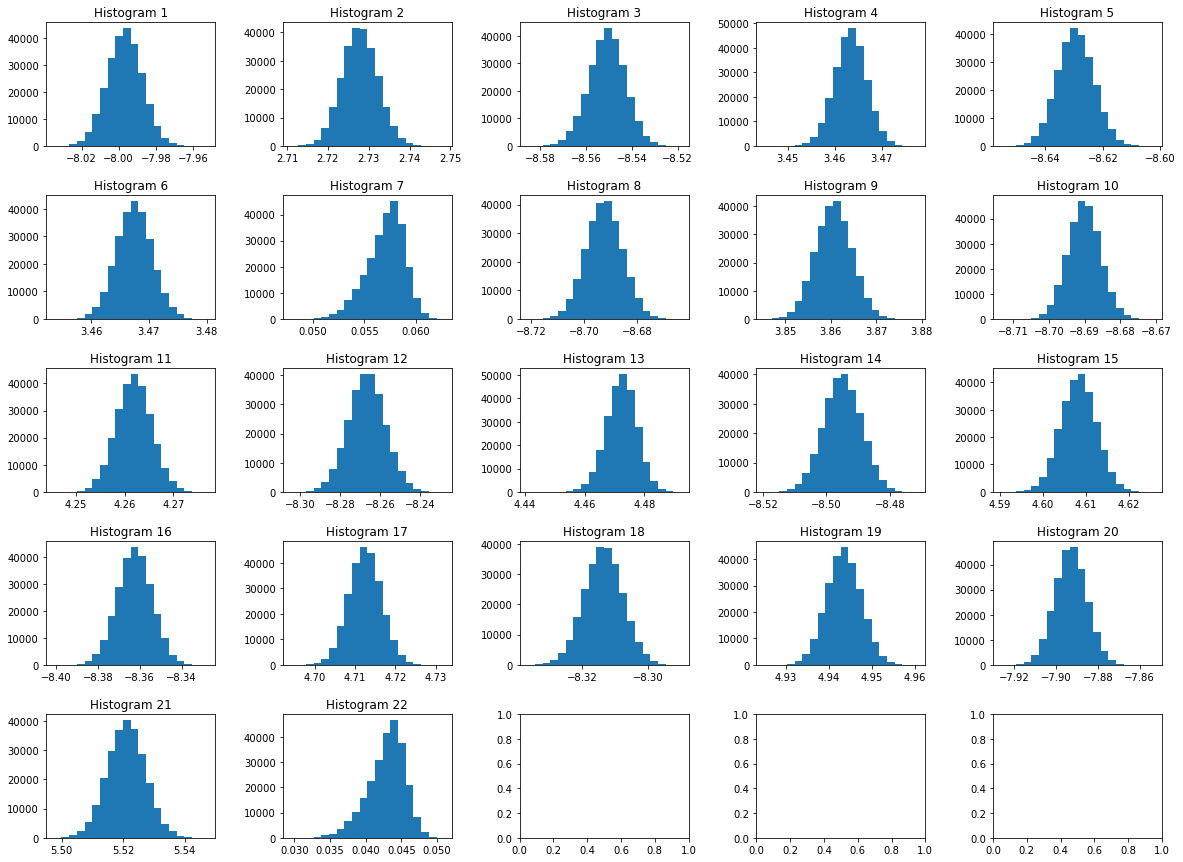

In [425]:
import numpy as np
import matplotlib.pyplot as plt

posterior = np.loadtxt("Posterior_noskin.txt")

# Generate random data for demonstration
np.random.seed(0)
data = posterior[:,8:30]

# Create subplots
fig, axs = plt.subplots(5, 5, figsize=(20, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

# Plot histograms
for i in range(5):
    for j in range(5):
        if ((i*5 + j) > 21):
            axs.axis('off')
        else:
            axs[i, j].hist(data[:, i * 5 + j], bins=20)
            axs[i, j].set_title(f'Histogram {i*5 + j + 1}')
        print(i*5 +j,i,j)

# Plot remaining two histograms in the last row
for k in range(2):
    axs[4, k].hist(data[:, 20 + k], bins=20)
    axs[4, k].set_title(f'Histogram {20 + k + 1}')

# Hide empty subplots
for ax in axs.flat:
    if not ax.get_title():
        ax.axis('off')

plt.tight_layout()
plt.show()